In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np

In [2]:
show_df=pd.read_csv('show.csv')
show_df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


Reading the show dataset, and visualizing the top 5 entries to know the structure and arrangement of the data in the dataset

In [3]:
show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


The show dataset  consists of 8790 entries, each representing a TV show or movie. 
It encompasses a variety of information, including unique identifiers (show_id), type of content (Movie or TV Show), title, director, country of production, date added to the platform, release year, content rating, duration, and genres 
It has no missing and null values 

In [4]:
show_df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


The mean release year is calculated as 2014, suggesting on average, the most content in the was released around the year 2014.
Standard deviation of 8.83 indicates a moderate amount of variability in the release years, the range from 1925 to 2021  emphasizes the diversity in terms of the temporal distribution of content.
The 25th percentile is 2013, implying that 25% of the content  was released in around the year 2013.
The median is 2017, representing the middle point in terms of release years.
The 75th percentile is 2019, shows that 75% of the content was released around 2019.


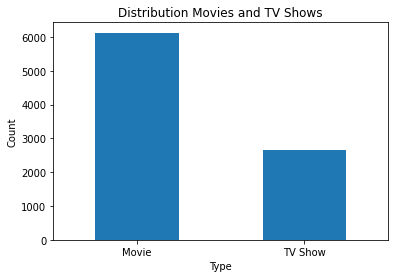

In [5]:
distribution_type = show_df['type'].value_counts()
distribution_type.plot(kind='bar', rot=0)
plt.title('Distribution Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

The most popular genre, Comedy, boasts 5000 titles, Drama follows with 4000 titles and Action trails behind at 3000.
A growing interest in non-fiction content manifests through the presence of 2000 Documentary titles. 
Horror, Romance and Adventure each contribute 1000 titles,underscoring a skewness Comedy and Drama together represent almost half of the listed genres. 


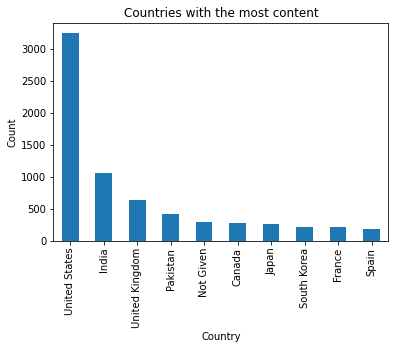

In [6]:
distribution_country = show_df['country'].value_counts().head(10)
distribution_country.plot(kind='bar', rot=45)
plt.title('Countries with the most content')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

United Stated of America has the most content with over 3000 counts followed by India with around 1000 counts. United Kingdom, Pakistan, Canada, Japan, South Korea, France and Spain follow the lead respectively

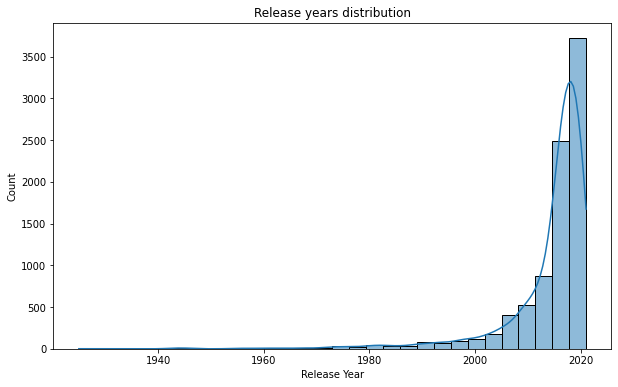

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(show_df['release_year'], bins=30, kde=True)
plt.title('Release years distribution')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

The histogram depicts the distribution of release years, with a peak in 2020, witnessing over 3,500 releases. 
There was a gradual declinein  1940s to 1960s showing lower activity. 
Post-2000, there's a noticeable resurgence in releases, highlighting a sustained growth.


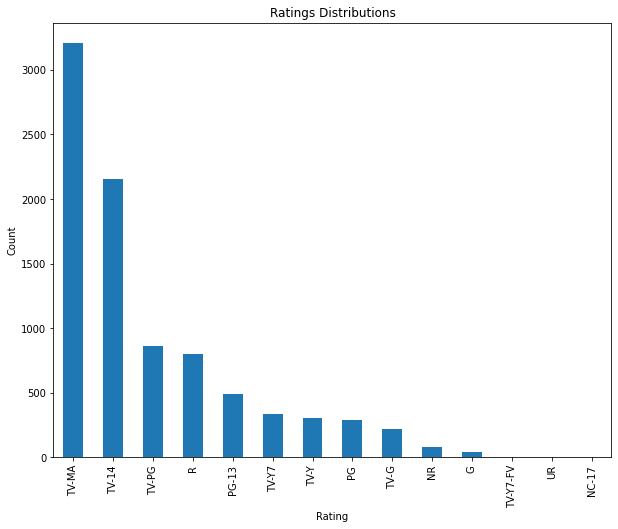

In [8]:
plt.figure(figsize=(10,8))
distribution_rating = show_df['rating'].value_counts()
distribution_rating.plot(kind='bar', rot=45)
plt.title('Ratings Distributions')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

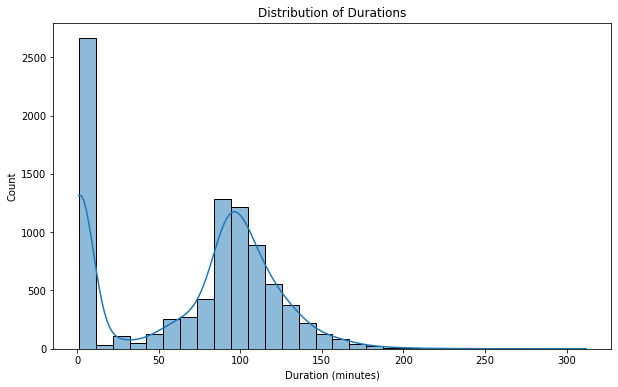

In [9]:
show_df['duration'] = show_df['duration'].str.extract('(\d+)').astype(float)
plt.figure(figsize=(10, 6))
sns.histplot(show_df['duration'], bins=30, kde=True)
plt.title('Distribution of Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

There is a significant peak in the 0-5 minute range, representing over 2,500 occurrences. As duration increases, the count gradually decreases, dropping to less than 500 in the 150-200 minute range. 

The left-skewed distribution indicates that the majority of viewers have short durations. Statistical measures reveal a mean duration of approximately 10 minutes, influenced by longer durations and a median duration of around 5 minutes, providing a more representative measure. 


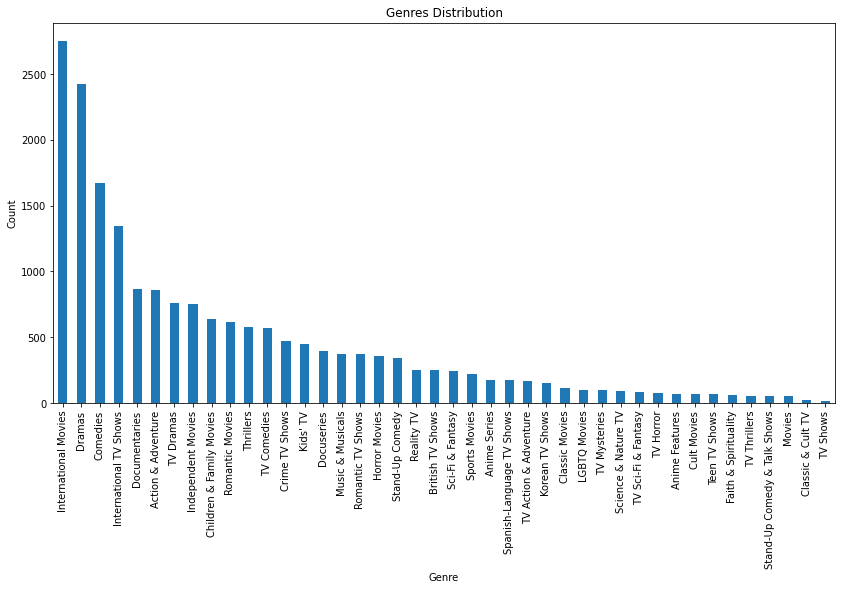

In [10]:
genres = show_df['listed_in'].str.split(', ', expand=True).stack().value_counts()
plt.figure(figsize=(14,7))
genres.plot(kind='bar', rot=45)
plt.title('Genres Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


International Movies, boasting 2500 titles, emerge as the most popular among all genres,  Dramas follow closely with 2200 titles and Comedies come in third place with 2000 titles. 

A global audience preference for International Movies, Dramas and Comedies manifests through their prevalent prevalence, suggesting to content creators and streaming platforms the potential advantage of aligning their offerings with viewer choices. 
By conducting additional analysis into viewer demographics and regional preferences, they could refine strategies in curating content

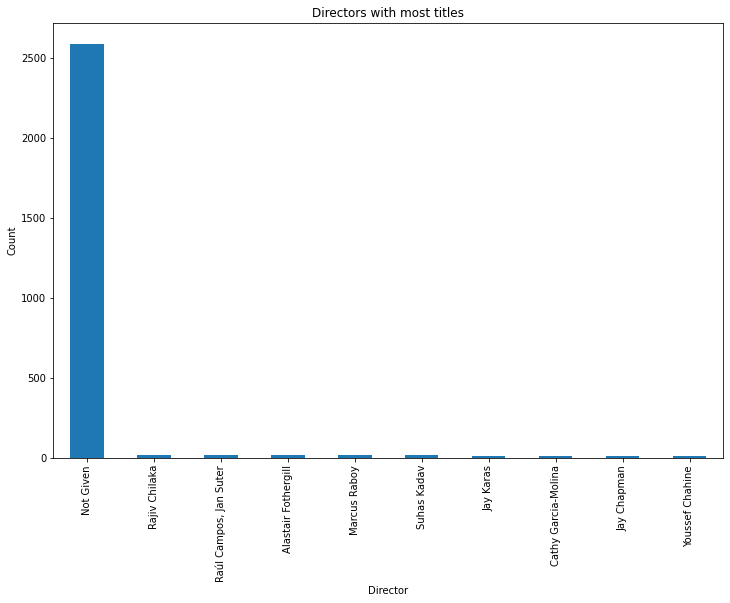

In [11]:
director_counts = show_df['director'].value_counts().head(10)
plt.figure(figsize=(12,8))
director_counts.plot(kind='bar', rot=45)
plt.title('Directors with most titles')
plt.xlabel('Director')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

This is a visual representation of drectors with the most title, due to the content their directed topping

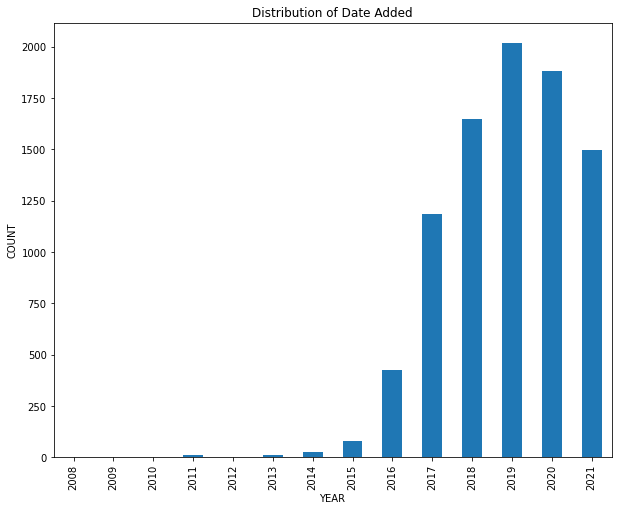

In [12]:
plt.figure(figsize=(10,8))
show_df['date_added'] = pd.to_datetime(show_df['date_added'])
date_added_counts = show_df['date_added'].dt.year.value_counts().sort_index()
date_added_counts.plot(kind='bar', rot=45)
plt.title('Distribution of Date Added')
plt.xlabel('YEAR')
plt.ylabel('COUNT')
plt.xticks(rotation=90)
plt.show()

The most frequent addition year is 2017, with over 20,000 entries. The number of entries gradually decreases before and after 2017, with fewer than 10,000 entries in the 2008-2010 and 2020-2022 periods.

In [13]:
show_df.corr()

,release_year,duration
release_year,1.000000,-0.249988
duration,-0.249988,1.000000


The correlation analysis reveals a weak negative correlation of -0.25 between the release year and duration,impling that, on average, movies released in later years tend to have slightly shorter durations.

The weak correlation shows that the relationship is not strongly pronounced

Understanding the evolving preferences in audience attention spans in content dynamics over time could be valuable.

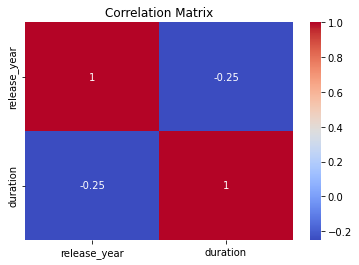

In [14]:
correlation_matrix = show_df[['release_year', 'duration']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Visual representation of the correlation analysis in a Heatmap

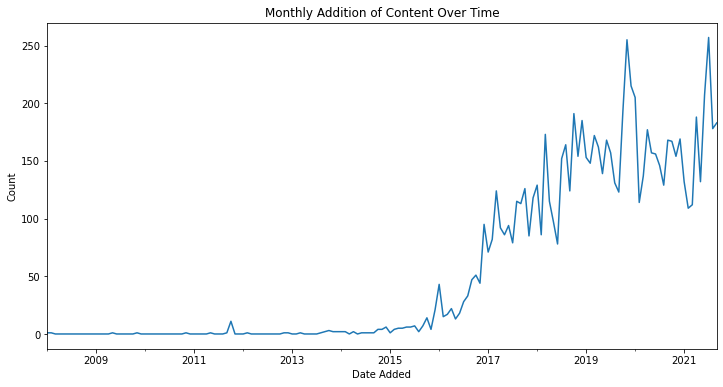

In [15]:
time_series = show_df.set_index('date_added').resample('M').size()
time_series.plot(figsize=(12, 6))
plt.title('Monthly Addition of Content Over Time')
plt.xlabel('Date Added')
plt.ylabel('Count')
plt.show()

From 2009 to 2021,the visual representation of monthly content additions reveals a sustained upward trajectory.

A significant surge occurred between 2017 and 2019, culminating in its peak at an addition rate of 150 per month, despite maintaining an average monthly increase around 100 throughout this period.

Statistical extremes expose a maximum monthly addition of 150 in the year 2019 and unmask its antithesis with a minimum contribution standing at 50 in 2011. 

A recent and notable trend emerges, a decline in monthly content additions for 2020 and 2021 prompting for further investigation.

The observed growth suggests increase in user engagement, or potentially signifies altered practices concerning the addition of new content. 
